# Experiments

In [67]:
import os
import IPython.display as ipd

for filename in os.listdir('./test_audio'):
    ipd.Audio('./test_audio/' + filename)

In [ ]:
import os
import pandas as pd
import librosa.display
import matplotlib.pyplot as plt
import tensorflow as tf

for filename in os.listdir('./test'):
    data, sampling_rate = librosa.load('./test/' + filename)

    plt.figure(figsize=(12, 4))
    librosa.display.waveplot(data, sr=sampling_rate)

In [ ]:
import speech_recognition as sr

In [ ]:
r = sr.Recognizer()

In [ ]:
zero = sr.AudioFile('0_jackson_2.wav')

In [ ]:
with zero as source:
    audio = r.record(source)

In [ ]:
print(r.recognize_google(audio))

# This is the main training part:

## training with audio files:

In [1]:
#imports:

from export_model import *
from preprocess import *
import numpy as np
import os
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import itertools
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [11]:
%load_ext autoreload
%autoreload 2

#from preprocess import *
#import keras
#from keras.models import Sequential
#from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
#from keras.utils import to_categorical
#from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
#from sklearn.preprocessing import LabelEncoder
#import itertools

# Second dimension of the feature is dim2
feature_dim_2 = 11

# Save data to array file first
save_data_to_array(max_len=feature_dim_2)

# # Loading train set and test set
X_train, X_test, y_train, y_test = get_train_test()

# # Feature dimension
#defaults at the end
feature_dim_1 = 20   #20
channel = 1          #1
epochs = 50         #50
batch_size = 100     #100
verbose = 1          #1
# change num_classes depending on the amount of labels
num_classes = 12

# Reshaping to perform 2D convolution
X_train = X_train.reshape(X_train.shape[0], feature_dim_1, feature_dim_2, channel)
X_test = X_test.reshape(X_test.shape[0], feature_dim_1, feature_dim_2, channel)

y_train_hot = to_categorical(y_train)
y_test_hot = to_categorical(y_test)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Saving vectors of label - '9': 100%|█████████████████████████████████████████████████| 245/245 [00:05<00:00, 39.45it/s]


## model & prediction

In [3]:
def get_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=(feature_dim_1, feature_dim_2, channel)))
    model.add(Conv2D(48, kernel_size=(2, 2), activation='relu'))
    model.add(Conv2D(120, kernel_size=(2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
    return model

# Predicts one sample
def predict(filepath, model):
    sample = wav2mfcc(filepath)
    sample_reshaped = sample.reshape(1, feature_dim_1, feature_dim_2, channel)
    return get_labels()[0][
            np.argmax(model.predict(sample_reshaped))
    ]

## Train model:

In [12]:
model = get_model()
history = model.fit(X_train, y_train_hot, batch_size=batch_size, epochs=epochs, verbose=verbose, validation_data=(X_test, y_test_hot))

Train on 2012 samples, validate on 1342 samples
Epoch 1/50
2012/2012 [==============================] - ETA: 15s - loss: 6.1324 - acc: 0.10 - ETA: 8s - loss: 6.7553 - acc: 0.1050 - ETA: 5s - loss: 6.6199 - acc: 0.096 - ETA: 4s - loss: 5.9644 - acc: 0.102 - ETA: 3s - loss: 5.4231 - acc: 0.096 - ETA: 3s - loss: 4.9878 - acc: 0.105 - ETA: 2s - loss: 4.6502 - acc: 0.107 - ETA: 2s - loss: 4.3799 - acc: 0.108 - ETA: 2s - loss: 4.1534 - acc: 0.120 - ETA: 1s - loss: 3.9713 - acc: 0.126 - ETA: 1s - loss: 3.8348 - acc: 0.125 - ETA: 1s - loss: 3.7200 - acc: 0.127 - ETA: 1s - loss: 3.6064 - acc: 0.132 - ETA: 0s - loss: 3.5143 - acc: 0.135 - ETA: 0s - loss: 3.4387 - acc: 0.134 - ETA: 0s - loss: 3.3635 - acc: 0.136 - ETA: 0s - loss: 3.2942 - acc: 0.145 - ETA: 0s - loss: 3.2507 - acc: 0.147 - ETA: 0s - loss: 3.1969 - acc: 0.147 - ETA: 0s - loss: 3.1483 - acc: 0.150 - 3s 2ms/step - loss: 3.1409 - acc: 0.1521 - val_loss: 1.8997 - val_acc: 0.4009
Epoch 2/50
2012/2012 [==============================] - E

2012/2012 [==============================] - ETA: 2s - loss: 0.5298 - acc: 0.800 - ETA: 1s - loss: 0.4823 - acc: 0.825 - ETA: 1s - loss: 0.4897 - acc: 0.826 - ETA: 1s - loss: 0.4767 - acc: 0.832 - ETA: 1s - loss: 0.4634 - acc: 0.838 - ETA: 1s - loss: 0.4779 - acc: 0.831 - ETA: 1s - loss: 0.4783 - acc: 0.830 - ETA: 1s - loss: 0.4721 - acc: 0.833 - ETA: 1s - loss: 0.4526 - acc: 0.836 - ETA: 1s - loss: 0.4439 - acc: 0.838 - ETA: 1s - loss: 0.4441 - acc: 0.837 - ETA: 0s - loss: 0.4497 - acc: 0.833 - ETA: 0s - loss: 0.4548 - acc: 0.834 - ETA: 0s - loss: 0.4664 - acc: 0.831 - ETA: 0s - loss: 0.4638 - acc: 0.833 - ETA: 0s - loss: 0.4600 - acc: 0.833 - ETA: 0s - loss: 0.4504 - acc: 0.835 - ETA: 0s - loss: 0.4391 - acc: 0.841 - ETA: 0s - loss: 0.4489 - acc: 0.838 - ETA: 0s - loss: 0.4467 - acc: 0.839 - 3s 1ms/step - loss: 0.4451 - acc: 0.8400 - val_loss: 0.3146 - val_acc: 0.8845
Epoch 11/50
2012/2012 [==============================] - ETA: 2s - loss: 0.4251 - acc: 0.850 - ETA: 2s - loss: 0.3673

2012/2012 [==============================] - ETA: 1s - loss: 0.1928 - acc: 0.920 - ETA: 1s - loss: 0.2611 - acc: 0.905 - ETA: 1s - loss: 0.2389 - acc: 0.910 - ETA: 1s - loss: 0.2223 - acc: 0.910 - ETA: 1s - loss: 0.2037 - acc: 0.918 - ETA: 1s - loss: 0.2122 - acc: 0.915 - ETA: 1s - loss: 0.2191 - acc: 0.914 - ETA: 1s - loss: 0.2254 - acc: 0.911 - ETA: 1s - loss: 0.2229 - acc: 0.912 - ETA: 1s - loss: 0.2333 - acc: 0.909 - ETA: 0s - loss: 0.2367 - acc: 0.909 - ETA: 0s - loss: 0.2292 - acc: 0.911 - ETA: 0s - loss: 0.2304 - acc: 0.914 - ETA: 0s - loss: 0.2227 - acc: 0.917 - ETA: 0s - loss: 0.2291 - acc: 0.914 - ETA: 0s - loss: 0.2316 - acc: 0.913 - ETA: 0s - loss: 0.2293 - acc: 0.914 - ETA: 0s - loss: 0.2262 - acc: 0.915 - ETA: 0s - loss: 0.2275 - acc: 0.914 - ETA: 0s - loss: 0.2261 - acc: 0.914 - 3s 1ms/step - loss: 0.2261 - acc: 0.9150 - val_loss: 0.2894 - val_acc: 0.9069
Epoch 20/50
2012/2012 [==============================] - ETA: 1s - loss: 0.2712 - acc: 0.890 - ETA: 1s - loss: 0.2398

2012/2012 [==============================] - ETA: 2s - loss: 0.1804 - acc: 0.950 - ETA: 2s - loss: 0.1293 - acc: 0.965 - ETA: 2s - loss: 0.1522 - acc: 0.946 - ETA: 1s - loss: 0.1465 - acc: 0.945 - ETA: 1s - loss: 0.1554 - acc: 0.942 - ETA: 1s - loss: 0.1568 - acc: 0.943 - ETA: 1s - loss: 0.1682 - acc: 0.940 - ETA: 1s - loss: 0.1660 - acc: 0.942 - ETA: 1s - loss: 0.1694 - acc: 0.941 - ETA: 1s - loss: 0.1696 - acc: 0.941 - ETA: 1s - loss: 0.1824 - acc: 0.937 - ETA: 0s - loss: 0.1862 - acc: 0.935 - ETA: 0s - loss: 0.1886 - acc: 0.934 - ETA: 0s - loss: 0.1834 - acc: 0.935 - ETA: 0s - loss: 0.1806 - acc: 0.935 - ETA: 0s - loss: 0.1779 - acc: 0.937 - ETA: 0s - loss: 0.1732 - acc: 0.939 - ETA: 0s - loss: 0.1733 - acc: 0.938 - ETA: 0s - loss: 0.1722 - acc: 0.939 - ETA: 0s - loss: 0.1708 - acc: 0.940 - 3s 1ms/step - loss: 0.1700 - acc: 0.9409 - val_loss: 0.2885 - val_acc: 0.9136
Epoch 29/50
2012/2012 [==============================] - ETA: 2s - loss: 0.1114 - acc: 0.950 - ETA: 2s - loss: 0.1635

2012/2012 [==============================] - ETA: 2s - loss: 0.1135 - acc: 0.950 - ETA: 1s - loss: 0.1325 - acc: 0.935 - ETA: 1s - loss: 0.1117 - acc: 0.956 - ETA: 1s - loss: 0.1088 - acc: 0.960 - ETA: 1s - loss: 0.0929 - acc: 0.966 - ETA: 1s - loss: 0.1019 - acc: 0.958 - ETA: 1s - loss: 0.1024 - acc: 0.958 - ETA: 1s - loss: 0.1001 - acc: 0.960 - ETA: 1s - loss: 0.1083 - acc: 0.961 - ETA: 1s - loss: 0.1041 - acc: 0.962 - ETA: 0s - loss: 0.0992 - acc: 0.965 - ETA: 0s - loss: 0.0951 - acc: 0.966 - ETA: 0s - loss: 0.0989 - acc: 0.965 - ETA: 0s - loss: 0.0974 - acc: 0.966 - ETA: 0s - loss: 0.0977 - acc: 0.966 - ETA: 0s - loss: 0.0968 - acc: 0.966 - ETA: 0s - loss: 0.0964 - acc: 0.966 - ETA: 0s - loss: 0.0945 - acc: 0.966 - ETA: 0s - loss: 0.0919 - acc: 0.966 - ETA: 0s - loss: 0.0901 - acc: 0.967 - 3s 1ms/step - loss: 0.0896 - acc: 0.9672 - val_loss: 0.3431 - val_acc: 0.9136
Epoch 38/50
2012/2012 [==============================] - ETA: 2s - loss: 0.0988 - acc: 0.970 - ETA: 2s - loss: 0.0906

2012/2012 [==============================] - ETA: 2s - loss: 0.0774 - acc: 0.960 - ETA: 1s - loss: 0.0520 - acc: 0.970 - ETA: 1s - loss: 0.0450 - acc: 0.973 - ETA: 1s - loss: 0.0444 - acc: 0.977 - ETA: 1s - loss: 0.0507 - acc: 0.974 - ETA: 1s - loss: 0.0547 - acc: 0.975 - ETA: 1s - loss: 0.0618 - acc: 0.972 - ETA: 1s - loss: 0.0594 - acc: 0.975 - ETA: 1s - loss: 0.0622 - acc: 0.975 - ETA: 1s - loss: 0.0696 - acc: 0.975 - ETA: 0s - loss: 0.0741 - acc: 0.973 - ETA: 0s - loss: 0.0749 - acc: 0.973 - ETA: 0s - loss: 0.0718 - acc: 0.974 - ETA: 0s - loss: 0.0708 - acc: 0.975 - ETA: 0s - loss: 0.0692 - acc: 0.975 - ETA: 0s - loss: 0.0681 - acc: 0.975 - ETA: 0s - loss: 0.0683 - acc: 0.975 - ETA: 0s - loss: 0.0662 - acc: 0.975 - ETA: 0s - loss: 0.0655 - acc: 0.975 - ETA: 0s - loss: 0.0634 - acc: 0.976 - 3s 1ms/step - loss: 0.0635 - acc: 0.9761 - val_loss: 0.3669 - val_acc: 0.9173
Epoch 47/50
2012/2012 [==============================] - ETA: 1s - loss: 0.0712 - acc: 0.970 - ETA: 1s - loss: 0.0491

## Export current model:

In [14]:
#export_model(model)

y_predicted = model.predict_classes(X_test, batch_size=batch_size)
y_true_val = np.argmax(y_test_hot,axis=1)

class_rep = classification_report(y_true_val,y_predicted,digits=5)

settings = {
    "feature_dim_1": feature_dim_1,
    "feature_dim_2": feature_dim_2,
    "channel": channel,
    "epochs": epochs,
    "batch_size": batch_size,
    "train_accuracy": str(history.history.get('acc')[-1]),
    "test_accuracy": str(history.history.get('val_acc')[-1]),
    "train_loss": str(history.history.get('loss')[-1]),
    "test_loss": str(history.history.get('val_loss')[-1]),
    "classification_report": class_rep,
}

print(export_model(model, settings))

Exported to folder ./models/20181212_21-50-26


## Import a model:

In [ ]:
# import_model(PATH)
imported_model = import_model("./models/xxx")

## Predict on a new file:

In [ ]:
print(predict('./test_audio/12.wav', model=model))

## Predict on a folder:

In [5]:
FOLDER_PATH = './test_audio/'

for filename in os.listdir(FOLDER_PATH):
    pred = predict(FOLDER_PATH + filename, model=model)
    print(filename + " was predicted as: " + pred)

1.wav was predicted as: 11
10.wav was predicted as: 10
11.wav was predicted as: 11
12.wav was predicted as: 10
2.wav was predicted as: 2
3.wav was predicted as: 3
4.wav was predicted as: 5
5.wav was predicted as: 5
6.wav was predicted as: 6
7.wav was predicted as: 7
8.wav was predicted as: 8
9.wav was predicted as: 9


## Accuracy / Loss

In [ ]:
#Accuracy plot
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Full report with confusion matrix:

Accuracy : 0.9135618479880775

Classification Report
              precision    recall  f1-score   support

           0    0.91515   0.89881   0.90691       168
           1    0.89655   0.88136   0.88889       118
           2    0.94318   0.93258   0.93785        89
           3    0.89000   0.91753   0.90355        97
           4    0.93056   0.90541   0.91781       148
           5    0.94615   0.88489   0.91450       139
           6    0.93827   0.84444   0.88889        90
           7    0.82301   0.94898   0.88152        98
           8    0.87156   0.95960   0.91346        99
           9    0.88889   0.92632   0.90722        95
          10    1.00000   0.95960   0.97938        99
          11    0.93137   0.93137   0.93137       102

   micro avg    0.91356   0.91356   0.91356      1342
   macro avg    0.91456   0.91591   0.91428      1342
weighted avg    0.91571   0.91356   0.91377      1342

[[151   3   1   0   5   3   0   4   1   0   0   0]
 [  0 104   0   1   0   0   0

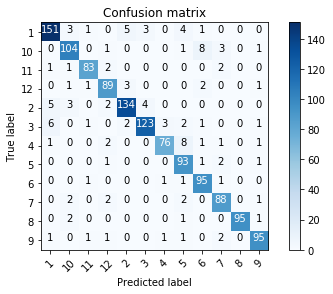

In [13]:
#should import labels directly from folder:
labels, _, _= get_labels("./audio")
labArray = []
for label in labels:
    labArray.append(label)

le = LabelEncoder()

le.fit_transform(labArray)

full_multiclass_report(model, X_test, y_test_hot, classes=le.inverse_transform(np.arange(12)))

# Functions for all the metrics and results

In [6]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title='Normalized confusion matrix'
    else:
        title='Confusion matrix'

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
def full_multiclass_report(model,
                           x,
                           y_true,
                           classes,
                           batch_size=32,
                           binary=False):

    # 1. Transform one-hot encoded y_true into their class number
    if not binary:
        y_true = np.argmax(y_true,axis=1)
    
    # 2. Predict classes and stores in y_pred
    y_pred = model.predict_classes(x, batch_size=batch_size)
    
    # 3. Print accuracy score
    print("Accuracy : "+ str(accuracy_score(y_true,y_pred)))
    
    print("")
    
    # 4. Print classification report
    print("Classification Report")
    print(classification_report(y_true,y_pred,digits=5))    
    
    # 5. Plot confusion matrix
    cnf_matrix = confusion_matrix(y_true,y_pred)
    print(cnf_matrix)
    plot_confusion_matrix(cnf_matrix,classes=classes)

In [7]:
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()